# SportsStats Olympic Games Analysis


## DESCRIPTIVE STATISTICS


In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import pywaffle as Waffle
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import shapefile as shp
import geopandas as gpd

In [32]:
athletes_clean = pd.read_csv(r"G:\My Drive\PERSONAL DEVELOPMENT\CAPSTONE PROJECTS\SportsStats Analysis\athletes_cleaned.csv")
noc = pd.read_csv(r"G:\My Drive\PERSONAL DEVELOPMENT\CAPSTONE PROJECTS\SportsStats Analysis\noc_regions.csv")

### Athletes per gender

In [33]:
grouped = athletes_clean.groupby(['Sex'])
print("Male athletes")
print(grouped.get_group("M").nunique())
print("---")
print("Female athletes")
print(grouped.get_group("F").nunique())

Male athletes
ID        101590
Name      100979
Sex            1
Age           74
Height        92
Weight       206
Team        1154
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         63
Event        554
Medal          3
dtype: int64
---
Female athletes
ID        33981
Name      33808
Sex           1
Age          62
Height       77
Weight      140
Team        374
NOC         222
Games        50
Year         34
Season        2
City         42
Sport        53
Event       269
Medal         3
dtype: int64


In [34]:
# Create the percentages of each to create a graph

total_athletes = sqldf('''SELECT Sex, 
                            COUNT(Sex) AS number_of_athletes
                        FROM athletes_clean 
                        GROUP BY 1''')
total_athletes


,Sex,number_of_athletes
0,F,74378
1,M,195353


In [35]:
total_athletes_ratio = pd.crosstab(athletes_clean['ID'].count(), athletes_clean['Sex'], normalize = 0).add_prefix(('ratio_'))
#total_athletes_ratio['ratio'] = total_athletes_ratio['F'].div(total_athletes_ratio['M'])

total_athletes_ratio

Sex,ratio_F,ratio_M
row_0,,
269731,0.275749,0.724251


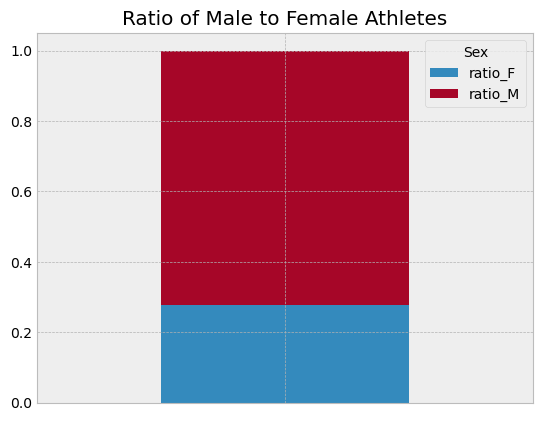

In [87]:
# Visualization of the ratios

fig = total_athletes_ratio.plot( kind = 'bar', stacked = True)
plt.style.use('bmh')
plt.xlabel('')
for xlabel_i in fig.axes.get_xticklabels():
    xlabel_i.set_visible(False)
for ticks in fig.axes.get_xticklines():
    ticks.set_visible(False)
for ticks in fig.axes.get_yticklines():
    ticks.set_visible(False)
plt.title("Ratio of Male to Female Athletes")
plt.savefig('Ratio_male_to_female.png')
plt.show()

Male athletes dominate representation in the Olympic Games overall

### Medal Distribution by Gender

In [37]:
# Create a dataframe for genders and medals

gender_df = athletes_clean.drop(
    ["ID", "Name", "Age", "Height", "Weight", "Team", "NOC", "Games", "Year", "Season", "City", "Sport", "Event"], 
    axis = 'columns')

#Drop no medals

gender_df = gender_df.dropna()

gender_df


,Sex,Medal
3,M,Gold
37,M,Bronze
38,M,Bronze
40,M,Bronze
41,M,Bronze
...,...,...
269693,F,Silver
269695,F,Bronze
269697,M,Bronze
269717,F,Bronze


In [38]:
#Add a counter column

gender_grouped = gender_df.groupby(['Medal','Sex']).value_counts().sort_index()
gg = gender_grouped.reset_index()
gg

,Medal,Sex,0
0,Bronze,F,3771
1,Bronze,M,9524
2,Gold,F,3747
3,Gold,M,9622
4,Silver,F,3735
5,Silver,M,9373


In [39]:
gender_df['Counter'] = 1
gg1 = gender_df.groupby(['Medal','Sex'])['Counter'].sum()
gg1

Medal   Sex
Bronze  F      3771
        M      9524
Gold    F      3747
        M      9622
Silver  F      3735
        M      9373
Name: Counter, dtype: int64

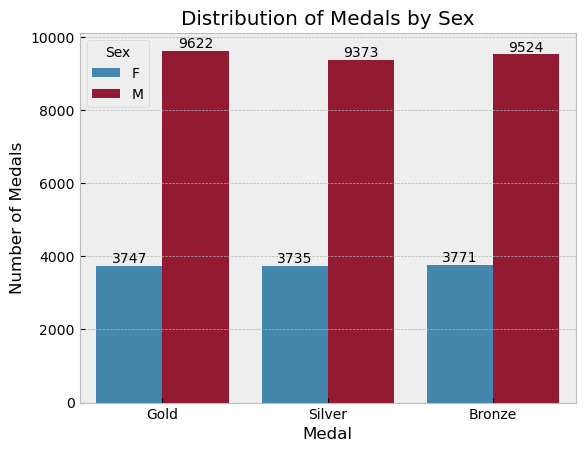

In [40]:
gg2 = gender_df.groupby(['Sex', 'Medal']).Medal.count().reset_index(name='counts')


ax = sns.barplot(data = gg2,
                   x = 'Medal',
                   y = 'counts',
                   hue = 'Sex',
                   order = ['Gold', 'Silver', 'Bronze'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_ylabel('Number of Medals')
ax.set_title('Distribution of Medals by Sex')
plt.savefig('Distribution_medal_by_sex.png')
plt.show()


Independently of the medal type, more males win medals. 
However, this is to be expected due to their higher representation in the games.

## ANALYSIS OF ATHLETES AGE

### Distribution of Athletes by Age

In [41]:
age_distribution = sqldf('''SELECT Age,
                                COUNT(Age) as number_of_athletes
                        FROM athletes_clean 
                        GROUP BY 1''')
age_distribution =  age_distribution.dropna()
age_distribution

,Age,number_of_athletes
1,10.0,1
2,11.0,13
3,12.0,39
4,13.0,187
5,14.0,834
...,...,...
70,81.0,2
71,84.0,1
72,88.0,1
73,96.0,1


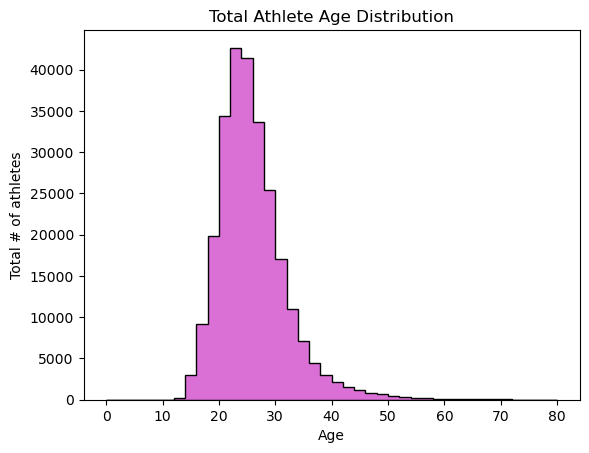

In [89]:
age_distribution_graph = sqldf('''SELECT Age
                        FROM athletes_clean''')
fig3 = plt.hist(age_distribution_graph, 
                40,
                color = 'orchid',
                histtype = 'stepfilled',
                range = [0, 80],
               edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Total # of athletes')
plt.title('Total Athlete Age Distribution')
plt.style.use('default')
plt.savefig('Total_age_distribution.png')
plt.show()

Athletes seem to be more likely to be between 20 and 30 years old.

In [111]:
age_distribution1 = sqldf('''SELECT Age,
                                COUNT(Age) as number_of_athletes,
                                Medal
                        FROM athletes_clean 
                        WHERE Medal IS NOT NULL
                        GROUP BY 1''')
age_distribution1 =  age_distribution1.dropna()
age_distribution1

,Age,number_of_athletes,Medal
1,10.0,1,Bronze
2,11.0,1,Silver
3,12.0,6,Silver
4,13.0,16,Gold
5,14.0,75,Bronze
...,...,...,...
57,68.0,2,Silver
58,69.0,2,Bronze
59,71.0,2,Silver
60,72.0,2,Bronze


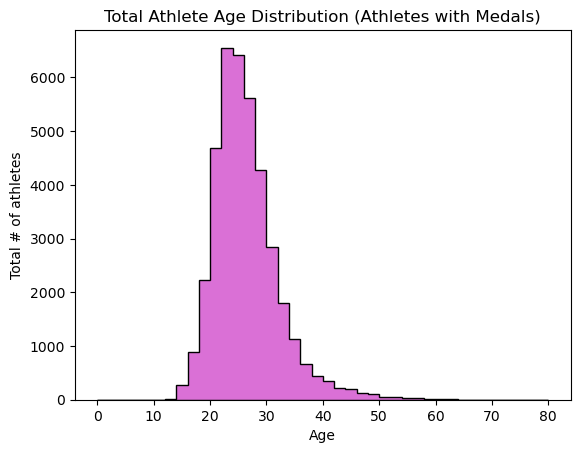

In [114]:
age_distribution1_graph = sqldf('''SELECT Age
                        FROM athletes_clean
                        WHERE Medal IS NOT NULL''')
fig3 = plt.hist(age_distribution1_graph, 
                40,
                color = 'orchid',
                histtype = 'stepfilled',
                range = [0, 80],
               edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Total # of athletes')
plt.title('Total Athlete Age Distribution (Athletes with Medals)')
plt.style.use('default')
plt.savefig('Total_age_distribution1.png')
plt.show()

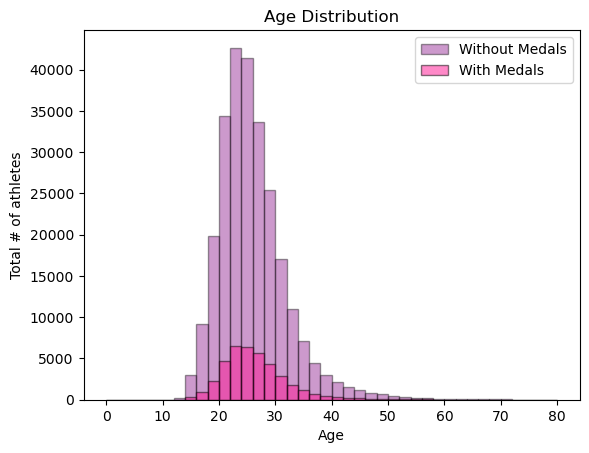

In [119]:
## Overlap both graphs

plt.hist(age_distribution_graph,
        40,
        range = [0, 80],
        label = 'Without Medals',
        alpha = 0.4,
        edgecolor = 'black',
        color = 'Purple')
plt.hist(age_distribution1_graph,
        40,
        range = [0, 80],
        label = 'With Medals',
        alpha = 0.5,
        edgecolor = 'black',
        color = 'deeppink')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Total # of athletes')
plt.title('Age Distribution')
plt.style.use('default')

plt.savefig('Age_distribution1.png')
plt.show()

### Distribution of Athlete's age by sex

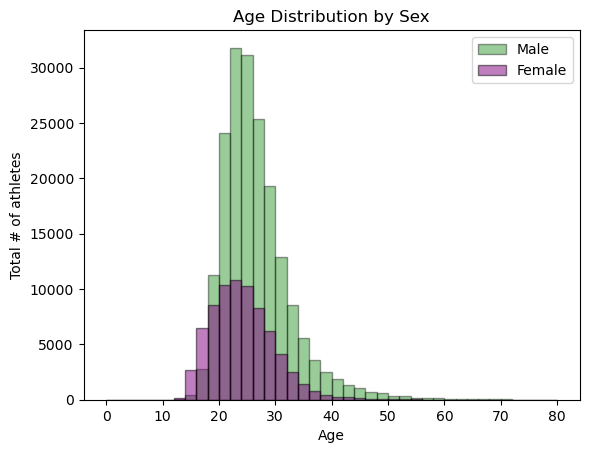

In [43]:
age_female = sqldf('''SELECT Age
                        FROM athletes_clean
                        WHERE Sex = "F"''')

age_male = sqldf('''SELECT Age
                        FROM athletes_clean
                        WHERE Sex = "M"''')
#age_female
#age_male

plt.hist(age_male,
        40,
        range = [0, 80],
        label = 'Male',
        alpha = 0.4,
        edgecolor = 'black',
        color = 'Green')
plt.hist(age_female,
        40,
        range = [0, 80],
        label = 'Female',
        alpha = 0.5,
        edgecolor = 'black',
        color = 'Purple')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Total # of athletes')
plt.title('Age Distribution by Sex')
plt.style.use('default')

plt.savefig('Age_distribution_sex.png')
plt.show()


Women are younger in general when compared to male athletes.

### SUMMER VS WINTER OLYMPIC GAMES

In [44]:
season = athletes_clean.groupby(athletes_clean['Season'])
print("Summer games")
print(season.get_group("Summer").nunique())
print("---")
print("Winter games")
print(season.get_group("Winter").nunique())

Summer games
ID        116776
Name      116122
Sex            2
Age           74
Height        95
Weight       219
Team        1157
NOC          230
Games         29
Year          29
Season         1
City          23
Sport         52
Event        651
Medal          3
dtype: int64
---
Winter games
ID        18958
Name      18923
Sex           2
Age          47
Height       64
Weight      125
Team        221
NOC         119
Games        22
Year         22
Season        1
City         19
Sport        17
Event       119
Medal         3
dtype: int64


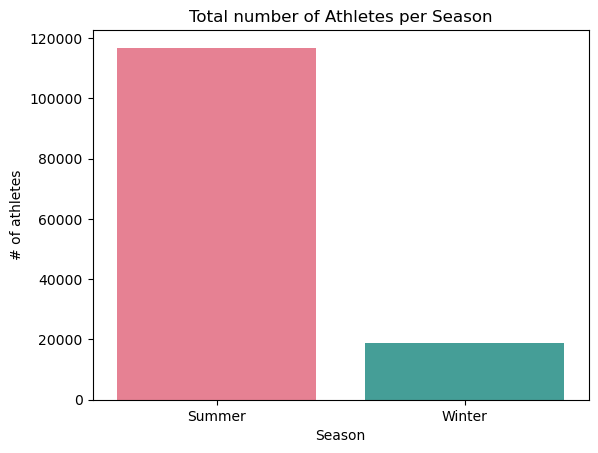

In [45]:
# Create the percentages of each to create a graph

total_season = sqldf('''SELECT Season, 
                            COUNT (DISTINCT ID) AS number_of_athletes,
                             COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                        FROM athletes_clean 
                        GROUP BY Season''')
total_season

fig3 = sns.barplot(data = total_season,
                   x = 'Season',
                   y = 'number_of_athletes',
                  palette = "husl")

fig3.set_xlabel('Season')
fig3.set_ylabel('# of athletes')
fig3.set_title('Total number of Athletes per Season')
plt.savefig('summer_vs_winter.png')

The summer Olympics have a much greater attendance of atheltes.

In [46]:
# Summer Olympics

summer_distribution = sqldf('''SELECT Sex,
                        COUNT(*) * 100.00 / SUM(COUNT(*)) over () AS ratio
                 FROM athletes_clean
                 WHERE Season = 'Summer'
                 GROUP BY Sex''')
summer_distribution

,Sex,ratio
0,F,26.811866
1,M,73.188134


In [47]:
# Winter Olympics

winter_distribution = sqldf('''SELECT Sex,        
                        COUNT(*) * 100.00 / SUM(COUNT(*)) over () AS ratio
                 FROM athletes_clean
                 WHERE Season = 'Winter'
                 GROUP BY Sex''')

winter_distribution

,Sex,ratio
0,F,31.049749
1,M,68.950251


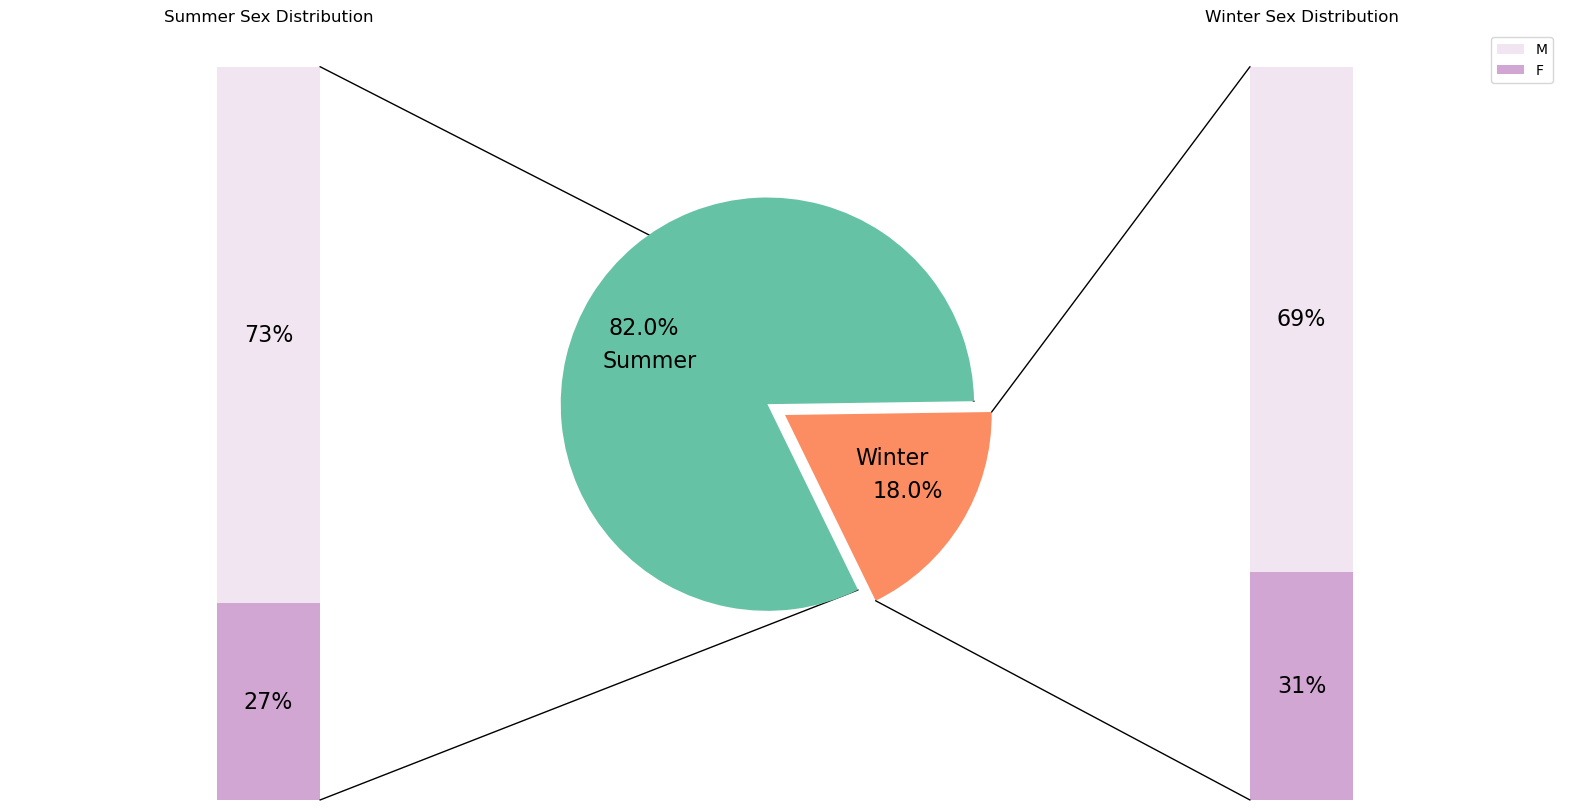

<Figure size 640x480 with 0 Axes>

In [48]:
# make figure and assign axis objects
fig4, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (20, 10))
plt.subplots_adjust(wspace=0)

#Overall Distribution

# pie chart parameters
overall_ratios = total_season['ratio']
labels = total_season['Season']
explode = [0.1, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax2.pie(overall_ratios, 
                     autopct='%1.1f%%', 
                     startangle=angle,
                     labels=labels, 
                     explode=explode,
                     colors = sns.color_palette('Set2'),
                     labeldistance = 0.4,
                     pctdistance = 0.7,
                     textprops = {'color': 'black', 'size': '16'})

#Summer Olympics

# Summer chart parameters
summer_ratios = summer_distribution['ratio']/100.00
summer_labels = summer_distribution['Sex']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(summer_ratios, summer_labels)])):
    bottom -= height
    bc = ax1.bar(0, 
                 height, 
                 width, 
                 bottom=bottom, 
                 label=label, 
                 alpha=0.1 + 0.25 * j,
                color =['purple', 'red'])
    ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center', size = 16)

ax1.set_title('Summer Sex Distribution')
#ax1.legend()
ax1.axis('off')
ax1.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[1].theta1, wedges[1].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(summer_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(width / 2, bar_height), coordsA=ax1.transData,
                      xyB=(x, y), coordsB=ax2.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax1.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(width / 2, 0), coordsA=ax1.transData,
                      xyB=(x, y), coordsB=ax2.transData)
con.set_color([0, 0, 0])
ax1.add_artist(con)
con.set_linewidth(1)

# Winter Olympics


# Winter chart parameters
winter_ratios = winter_distribution['ratio']/100.00
winter_labels = winter_distribution['Sex']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(winter_ratios, winter_labels)])):
    bottom -= height
    bc = ax3.bar(0, 
                 height, 
                 width, 
                 bottom=bottom,  
                 label=label, 
                 alpha=0.1 + 0.25 * j,
                color = ['purple', 'red'])
    ax3.bar_label(bc, labels=[f"{height:.0%}"], label_type='center', size = 16)

ax3.set_title('Winter Sex Distribution')
ax3.legend()
ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[1].theta1, wedges[1].theta2
center, r = wedges[1].center, wedges[1].r
bar_height = sum(winter_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax3.transData,
                      xyB=(x, y), coordsB=ax2.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax3.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax3.transData,
                      xyB=(x, y), coordsB=ax2.transData)
con.set_color([0, 0, 0])
ax3.add_artist(con)
con.set_linewidth(1)


plt.show()
plt.savefig('distribution_sex_season.png')

When we compare Summer vs Winter Olympics, the sex distribution is similar. 
However, winter Olympics have a slight higher representation of female atheltes.

In [49]:
##SUMMER OLYMPICS

summer_olympics = sqldf('''SELECT Sex,
                                    AVG(Age),
                                    AVG(Height),
                                    AVG(Weight)
                            FROM athletes_clean
                            WHERE Season = "Summer"
                            GROUP BY Sex''')

summer_olympics

,Sex,AVG(Age),AVG(Height),AVG(Weight)
0,F,23.616681,168.169025,60.087644
1,M,26.292306,178.902698,75.604658


In [50]:
## WINTER OLYMPICS

winter_olympics = sqldf('''SELECT Sex,
                                    AVG(Age),
                                    AVG(Height),
                                    AVG(Weight)
                            FROM athletes_clean
                            WHERE Season = "Winter"
                            GROUP BY Sex''')

winter_olympics

,Sex,AVG(Age),AVG(Height),AVG(Weight)
0,F,24.014398,166.528250,59.755156
1,M,25.504261,178.668699,76.357058


There are significant differences between male and female participants not only in terms of expected height and weight, but also in terms of age. 
The first two differences can be attributed to biology. 
Although the latter may require more than just: it is worth considering social factors at the same time.

Another interesting fact is that the age gap in the Winter Olympics is much smaller (~2.8 years old and 1.5 years old)

In [51]:
# Medals by year by season

summer_medals = sqldf('''SELECT Year,
                                CAST (medal_count AS FLOAT)/total_count AS medal_ratio,
                                CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                                CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                                CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio 
                            FROM (
                                 SELECT Year,
                                 COUNT(*) AS total_count,
                                 SUM(CASE
                                     WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                     END) AS medal_count,
                                SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                   END) AS gold_count,
                                SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                   END) AS silver_count,
                                SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                   END) AS bronze_count
                             FROM athletes_clean
                             WHERE Season = 'Summer'
                             GROUP BY Year) new_table''')

summer_medals

,Year,medal_ratio,gold_ratio,silver_ratio,bronze_ratio
0,1896,0.376316,0.433566,0.300699,0.265734
1,1900,0.312434,0.333895,0.370995,0.295110
2,1904,0.373559,0.355967,0.335391,0.308642
3,1906,0.264282,0.342795,0.340611,0.316594
4,1908,0.270772,0.353791,0.338147,0.308063
5,1912,0.232921,0.346440,0.334750,0.318810
6,1920,0.304753,0.376911,0.342508,0.280581
7,1924,0.162818,0.332933,0.337740,0.329327
8,1928,0.157646,0.333787,0.325613,0.340599
9,1932,0.262475,0.353941,0.330757,0.315301


In [52]:
winter_medals = sqldf('''SELECT Year,
                                CAST (medal_count AS FLOAT)/total_count AS medal_ratio,
                                CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                                CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                                CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio 
                            FROM (
                                 SELECT Year,
                                 COUNT(*) AS total_count,
                                 SUM(CASE
                                     WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                     END) AS medal_count,
                                SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                   END) AS gold_count,
                                SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                   END) AS silver_count,
                                SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                   END) AS bronze_count
                             FROM athletes_clean
                             WHERE Season = 'Winter'
                             GROUP BY Year) new_table''')

winter_medals

,Year,medal_ratio,gold_ratio,silver_ratio,bronze_ratio
0,1924,0.282609,0.423077,0.292308,0.284615
1,1928,0.152921,0.337079,0.314607,0.348315
2,1932,0.261364,0.347826,0.347826,0.304348
3,1936,0.120670,0.333333,0.342593,0.324074
4,1948,0.125581,0.303704,0.355556,0.340741
5,1952,0.125000,0.330882,0.323529,0.345588
6,1956,0.114767,0.340000,0.326667,0.333333
7,1960,0.131720,0.340136,0.326531,0.333333
8,1964,0.104612,0.327957,0.360215,0.311828
9,1968,0.105235,0.331658,0.351759,0.316583


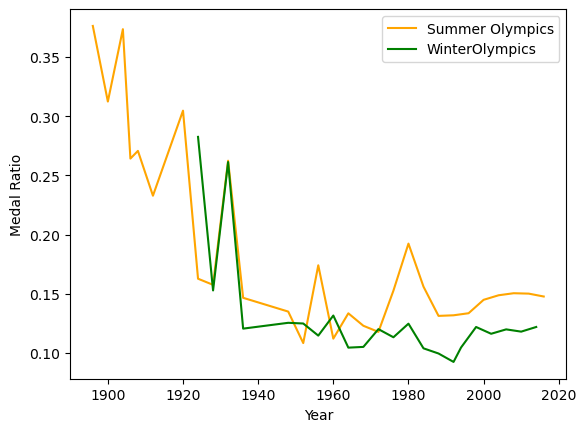

In [53]:
plt.plot(summer_medals.Year, summer_medals.medal_ratio, color = "Orange", label = "Summer Olympics")
plt.plot(winter_medals.Year, winter_medals.medal_ratio, color = "Green", label = "WinterOlympics")
plt.style.use('default')
plt.xlabel("Year")
plt.ylabel("Medal Ratio")
plt.legend()
plt.savefig('medal_ratio_per_season.png')

The distribution of medals between Winter and Summer Games has been normalised as years pass.

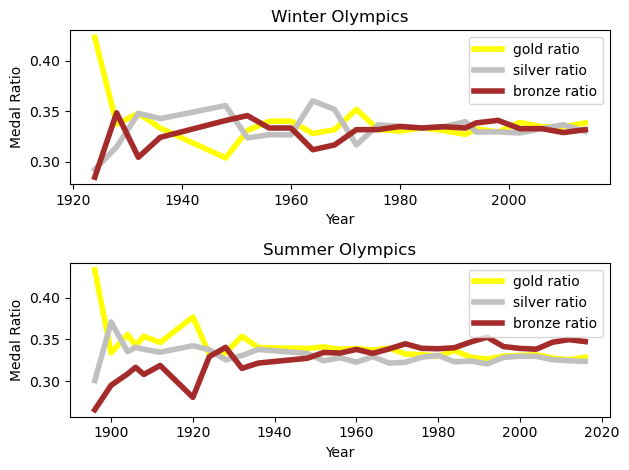

In [54]:
fig, ax = plt.subplots(2)
ax[0].plot(winter_medals.Year, winter_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[0].plot(winter_medals.Year, winter_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[0].plot(winter_medals.Year, winter_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
ax[0].legend(loc=1)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Medal Ratio")
ax[0].set_title("Winter Olympics")
ax[1].plot(summer_medals.Year, summer_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[1].plot(summer_medals.Year, summer_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[1].plot(summer_medals.Year, summer_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
plt.legend(loc=1)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Medal Ratio")
ax[1].set_title("Summer Olympics")
plt.tight_layout()

plt.savefig('type_medal_per_year.png')

Not taking into account earlier games, the distribution of gold, silver, and bronze medals is very similar.

In [55]:
# Sports Played on the First Event

game_list = sqldf('''SELECT DISTINCT(Sport)
                    FROM athletes_clean
                    ORDER BY Sport''')

game_list1896 = sqldf('''SELECT DISTINCT(Sport)
                    FROM athletes_clean
                    WHERE Year = 1896
                    ORDER BY Sport''')

number_sports = sqldf('''SELECT Year,
                                COUNT(DISTINCT Sport) AS count
                            FROM athletes_clean
                            GROUP BY Year''')

number_sports_winter = sqldf('''SELECT Year,
                                COUNT(DISTINCT Sport) AS count
                            FROM athletes_clean
                            WHERE Season = 'Winter'
                            GROUP BY Year''')

number_sports_summer = sqldf('''SELECT Year,
                                COUNT(DISTINCT Sport) AS count
                            FROM athletes_clean
                            WHERE Season = 'Summer'
                            GROUP BY Year''')

game_list
#game_list1896
number_sports
number_sports_summer
number_sports_winter

,Year,count
0,1924,10
1,1928,8
2,1932,7
3,1936,8
4,1948,9
5,1952,8
6,1956,8
7,1960,8
8,1964,10
9,1968,10


### Number of different sports played depending on the season and year

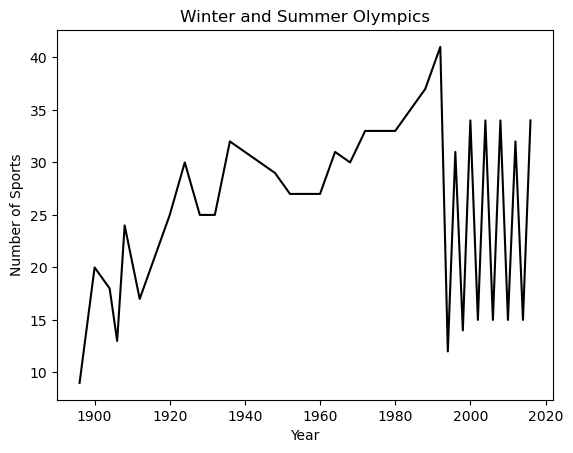

In [56]:
x = number_sports['Year']
y = number_sports['count']

fig6 = plt.plot(x, 
                y,
               color = 'black')
plt.xlabel("Year")
plt.ylabel("Number of Sports")
plt.title("Winter and Summer Olympics")
plt.style.use('default')
plt.savefig('number_sports.png')

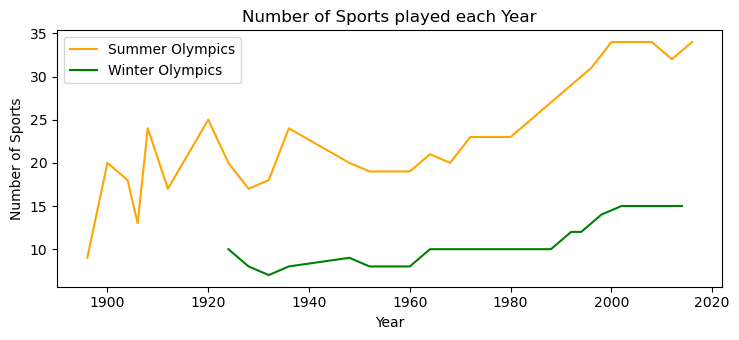

In [57]:
x = number_sports_summer['Year']
y = number_sports_summer['count']

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.150

fig6 = plt.plot(x, 
                y,
                label = 'Summer Olympics',
               color = 'Orange')

z = number_sports_winter['Year']
w = number_sports_winter['count']

fig6 = plt.plot(z, 
                w,
               color = 'Green',
               label = 'Winter Olympics')


plt.xlabel("Year")
plt.ylabel("Number of Sports")
plt.legend()
plt.title("Number of Sports played each Year")
plt.style.use('default')

plt.savefig('number_sports_winter.png')



Overall, 66 Sports have been played in the olympics. 
The trend is that, with the years, more games have been played in each seasson.

We can appreciate that after 1990, there is a demarcation every 2-4 years. 
This is something worth looking into. But it could be do to a separation of winter and summer olympics.

### Cummulative number of Olympic Games as years pass

In [58]:
season_year = sqldf('''SELECT Year,
                            Season,
                            CASE WHEN Season = 'Winter' THEN 1 ELSE 0 END AS winter_games,
                             SUM(CASE WHEN Season = 'Winter' THEN 1 ELSE 0 END) 
                                OVER (ORDER BY Year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cum_winter,
                            CASE WHEN Season = 'Summer' THEN 1 ELSE 0 END AS summer_games,
                            SUM(CASE WHEN Season = 'Summer' THEN 1 ELSE 0 END) 
                               OVER(ORDER BY Year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cum_summer
                        FROM athletes_clean
                        GROUP BY Year, Season''')


season_year

,Year,Season,winter_games,cum_winter,summer_games,cum_summer
0,1896,Summer,0,0,1,1
1,1900,Summer,0,0,1,2
2,1904,Summer,0,0,1,3
3,1906,Summer,0,0,1,4
4,1908,Summer,0,0,1,5
5,1912,Summer,0,0,1,6
6,1920,Summer,0,0,1,7
7,1924,Summer,0,0,1,8
8,1924,Winter,1,1,0,8
9,1928,Summer,0,1,1,9


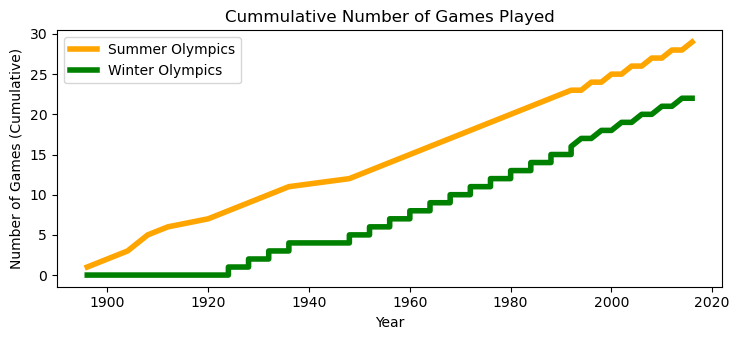

In [59]:
x = season_year['Year']
y = season_year['cum_summer']
z = season_year['cum_winter']


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.150

#Summer Games
fig71 = plt.plot(x, y, marker='', color='Orange', linewidth=4, label = "Summer Olympics")
plt.xlabel("Year")
plt.ylabel("Number of Games (Cumulative)")

#Winter Games
fig72 = plt.plot(x, z, marker='', color='Green', linewidth=4, label = "Winter Olympics")
plt.xlabel("Year")
plt.ylabel("Number of Games (Cumulative)")

plt.legend()
plt.title('Cummulative Number of Games Played')
plt.style.use('default')

plt.savefig('cummulative_games.png')

The distribution of winter games has changed over the years, starting in 1924

##  BEYOND DESCRIPTIVE ANALYTICS

### Medal Analysis by Year and Season

In [60]:
medal_count = sqldf('''SELECT Year,
                                Season,
                                COUNT(*) AS total_count,
                                SUM(CASE
                                    WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS medal_count,
                                SUM(CASE
                                    WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS gold_count,
                                SUM(CASE
                                    WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS silver_count,
                                SUM(CASE
                                    WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_count
                            FROM athletes_clean
                            GROUP BY Year, Season ''')

medal_count

,Year,Season,total_count,medal_count,gold_count,silver_count,bronze_count
0,1896,Summer,380,143,62,43,38
1,1900,Summer,1898,593,198,220,175
2,1904,Summer,1301,486,173,163,150
3,1906,Summer,1733,458,157,156,145
4,1908,Summer,3069,831,294,281,256
5,1912,Summer,4040,941,326,315,300
6,1920,Summer,4292,1308,493,448,367
7,1924,Summer,5110,832,277,281,274
8,1924,Winter,460,130,55,38,37
9,1928,Summer,4656,734,245,239,250


In [61]:
summer_medal_count = sqldf('''
                         SELECT Year,
                                 COUNT(*) AS total_count,
                                 SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS medal_count,
                                   SUM(CASE WHEN Medal = "Gold" THEN 1 ELSE 0 END) AS gold_count,
                                   SUM(CASE WHEN Medal = "Silver" THEN 1 ELSE 0 END) AS silver_count,
                                   SUM(CASE WHEN Medal = "Bronze" THEN 1 ELSE 0 END) AS bronze_count
                                FROM athletes_clean
                                WHERE Season = 'Summer'
                                GROUP BY Year 
                                   ''')
summer_medal_count

summer_medal_count_new = summer_medal_count[7:]

summer_medal_count_new

,Year,total_count,medal_count,gold_count,silver_count,bronze_count
7,1924,5110,832,277,281,274
8,1928,4656,734,245,239,250
9,1932,2465,647,229,214,204
10,1936,6251,917,312,310,295
11,1948,6308,852,289,284,279
12,1952,8270,897,306,291,300
13,1956,5127,893,302,293,298
14,1960,8119,911,309,294,308
15,1964,7702,1029,347,339,343
16,1968,8588,1057,359,340,358


In [62]:
winter_medal_count = sqldf('''
                         SELECT Year,
                                 COUNT(*) AS total_count,
                                 SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS medal_count,
                                   SUM(CASE WHEN Medal = "Gold" THEN 1 ELSE 0 END) AS gold_count,
                                   SUM(CASE WHEN Medal = "Silver" THEN 1 ELSE 0 END) AS silver_count,
                                   SUM(CASE WHEN Medal = "Bronze" THEN 1 ELSE 0 END) AS bronze_count
                                FROM athletes_clean
                                WHERE Season = 'Winter'
                                GROUP BY Year 
                                   ''')
winter_medal_count

,Year,total_count,medal_count,gold_count,silver_count,bronze_count
0,1924,460,130,55,38,37
1,1928,582,89,30,28,31
2,1932,352,92,32,32,28
3,1936,895,108,36,37,35
4,1948,1075,135,41,48,46
5,1952,1088,136,45,44,47
6,1956,1307,150,51,49,50
7,1960,1116,147,50,48,49
8,1964,1778,186,61,67,58
9,1968,1891,199,66,70,63


For correlation analysis we will discard summer data pre 1924 as there is no Winter equivalent

In [63]:
# Total Medal Correlation

total_medal_correlation = pd.DataFrame({'Summer_Total': summer_medal_count_new['medal_count'], 
                                        'Winter_Total': winter_medal_count['medal_count'],
                                       'Summer_Gold': summer_medal_count_new['gold_count'],
                                       'Winter_Gold': winter_medal_count['gold_count'],
                                       'Summer_Silver': summer_medal_count_new['silver_count'],
                                       'Winter_Silver': winter_medal_count['silver_count'],
                                       'Summer_Bronze': summer_medal_count_new['bronze_count'],
                                       'Winter_Bronze': winter_medal_count['bronze_count']})
corr_matrix = total_medal_correlation.corr(method = 'spearman')  
corr_matrix

,Summer_Total,Winter_Total,Summer_Gold,Winter_Gold,Summer_Silver,Winter_Silver,Summer_Bronze,Winter_Bronze
Summer_Total,1.000000,0.931189,0.998871,0.950849,0.995483,0.899017,0.992095,0.942857
Winter_Total,0.931189,1.000000,0.931189,0.987853,0.934764,0.995762,0.968722,0.998588
Summer_Gold,0.998871,0.931189,1.000000,0.950849,0.994353,0.899017,0.989836,0.942857
Winter_Gold,0.950849,0.987853,0.950849,1.000000,0.954424,0.981633,0.977659,0.987292
Summer_Silver,0.995483,0.934764,0.994353,0.954424,1.000000,0.902592,0.986448,0.946429
Winter_Silver,0.899017,0.995762,0.899017,0.981633,0.902592,1.000000,0.952637,0.993220
Summer_Bronze,0.992095,0.968722,0.989836,0.977659,0.986448,0.952637,1.000000,0.975000
Winter_Bronze,0.942857,0.998588,0.942857,0.987292,0.946429,0.993220,0.975000,1.000000


In [64]:
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
     .style.background_gradient(cmap ='coolwarm', axis = None, vmin = 0.9, vmax = 1)
     .highlight_null(color = '#f1f1f1')
     .set_precision(2))
plt.savefig('correlation_medal_counts1.pdf')

C:\Users\macar\AppData\Local\Temp\ipykernel_24196\1628330576.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2))


<Figure size 640x480 with 0 Axes>

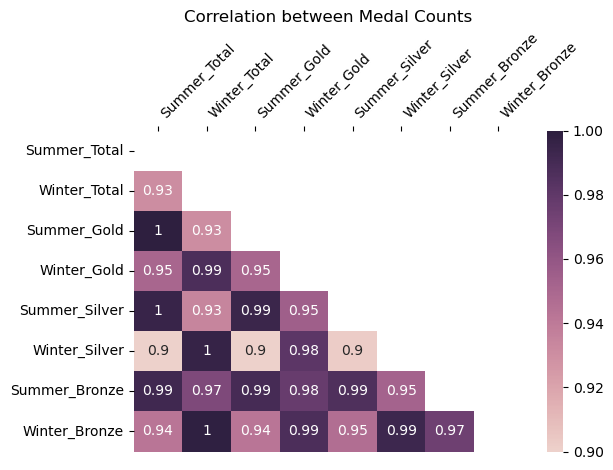

In [65]:
ax = sns.heatmap(corr_matrix,
            annot = True,
            cbar = True,
           cmap = sns.cubehelix_palette(as_cmap=True),
           vmin = 0.90,
           vmax = 1.00)

ax.xaxis.tick_top()
plt.xticks(rotation = 45, ha = 'left')
ax.set_title('Correlation between Medal Counts')
plt.tight_layout()
plt.savefig('correlation_medal_counts.jpeg')
plt.show()


The Pearon correlation coefficient between the total number of medals in the winter and summer olympics from 1924 to 2016, is 0.94, which is highly positive. Therefore, the performance of a country in winter olympics is highly correlated to that in summer olympics

I will then calculate the standard deviation in country performance through years. A Comparison between average std of Winter and that of Summer Olympics will help.

In [66]:
# Standard Deviation Calculation

x_simple = winter_medal_count.medal_count
y_simple = summer_medal_count_new.medal_count

std_medal_count_summer_olympics = np.std(y_simple)
std_medal_count_winter_olympics = np.std(x_simple)

print("std_medal_count_summer_olympics =",std_medal_count_summer_olympics)
print("std_medal_count_winter_olympics =",std_medal_count_winter_olympics)


std_medal_count_summer_olympics = 475.323015441357
std_medal_count_winter_olympics = 152.56899942903493


### Appearances by country

In [67]:
## Top 20 Countries with Most Appearances

appearances_country = sqldf('''SELECT Team,
                                        COUNT(Team) AS country_appearance
                                FROM athletes_clean
                                GROUP BY Team
                                ORDER BY country_appearance DESC''')

appearances_country

,Team,country_appearance
0,United States,17598
1,France,11817
2,Great Britain,11264
3,Italy,10213
4,Germany,9230
...,...,...
1179,Ariette-8,1
1180,Ariette-10,1
1181,Angerburg,1
1182,Alcyon-7,1


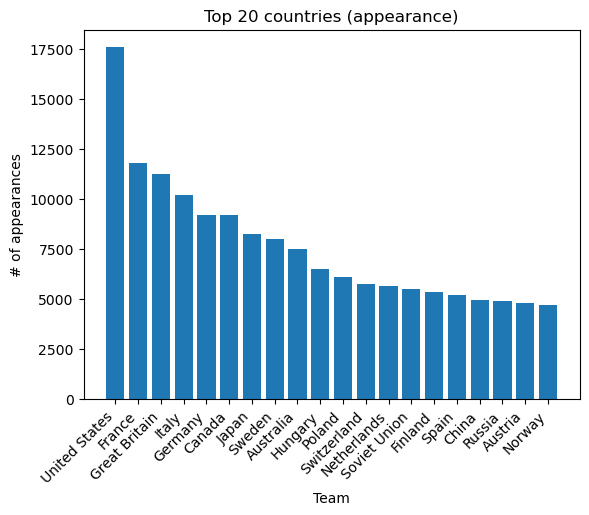

In [68]:
appearances_country = sqldf('''SELECT Team,
                                        COUNT(Team) AS country_appearance
                                FROM athletes_clean
                                GROUP BY Team
                                ORDER BY country_appearance DESC
                                LIMIT 20''')

fig = plt.bar(appearances_country['Team'],
             appearances_country['country_appearance'])
plt.xlabel('Team')
plt.ylabel('# of appearances')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 20 countries (appearance)')
plt.savefig('top_20_appearance.png')
plt.show()

### Medals by Country

In [69]:
country_medals = sqldf('''SELECT Team,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1
                                    WHEN Medal = 'Silver' THEN 1
                                    WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Total,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold_medals,
                                SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver_medals,
                                SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze_medals
                            FROM athletes_clean
                            GROUP BY Team
                            ORDER BY 2 DESC''')

country_medals

,Team,Total,Gold_medals,Silver_medals,Bronze_medals
0,United States,5219,2474,1512,1233
1,Soviet Union,2451,1058,716,677
2,Germany,1984,679,627,678
3,Great Britain,1673,519,582,572
4,France,1550,455,518,577
...,...,...,...,...,...
1179,Alain IV,0,0,0,0
1180,Akatonbo,0,0,0,0
1181,Acturus,0,0,0,0
1182,Acipactli,0,0,0,0


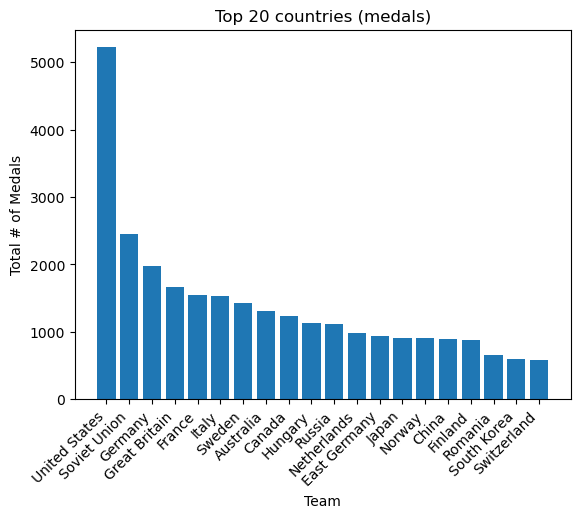

In [70]:
country_medals = sqldf('''SELECT Team,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1
                                    WHEN Medal = 'Silver' THEN 1
                                    WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Total,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold_medals,
                                SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver_medals,
                                SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze_medals
                            FROM athletes_clean
                            GROUP BY Team
                            ORDER BY 2 DESC
                            LIMIT 20''')

fig = plt.bar(country_medals['Team'],
             country_medals['Total'])
plt.xlabel('Team')
plt.ylabel('Total # of Medals')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 20 countries (medals)')
plt.savefig('top_20_medals.png')
plt.show()

### Correlation between number of appearances and number of medals

In [90]:
corr_table = sqldf('''SELECT a.Team,
                        a.Total AS medals,
                        b.country_appearance
                    FROM country_medals a
                    INNER JOIN appearances_country b
                        ON a.Team = b.Team''')
corr_table

,Team,medals,country_appearance
0,United States,5637,17598
1,Switzerland,691,5779
2,Sweden,1536,8004
3,Spain,489,5224
4,Soviet Union,2503,5535
5,Russia,1165,4922
6,Poland,565,6094
7,Norway,1033,4702
8,Netherlands,1040,5660
9,Japan,913,8269


In [91]:
corr_matrix = corr_table.corr(method = 'spearman')  
corr_matrix

C:\Users\macar\AppData\Local\Temp\ipykernel_24196\3002081592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_table.corr(method = 'spearman')


,medals,country_appearance
medals,1.000000,0.669173
country_appearance,0.669173,1.000000


In [92]:
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
     .style.background_gradient(cmap ='coolwarm', axis = None, vmin = 0.9, vmax = 1)
     .highlight_null(color = '#f1f1f1')
     .set_precision(2))

C:\Users\macar\AppData\Local\Temp\ipykernel_24196\51975641.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2))


,medals,country_appearance
medals,nan,nan
country_appearance,0.67,nan


There is not a strong correlation between the number of appearances and the number of medals. 
Is there maybe an interference with the Winter Olympics data? We will then explore this for only the Summer Olympics.

In [93]:
country_medals_summer = sqldf('''SELECT Team,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1
                                    WHEN Medal = 'Silver' THEN 1
                                    WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Total,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold_medals,
                                SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver_medals,
                                SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze_medals
                            FROM athletes_clean
                            WHERE Season = 'Summer'
                            GROUP BY Team
                            ORDER BY 2 DESC''')

country_medals_summer

appearances_country_summer = sqldf('''SELECT Team,
                                        COUNT(Team) AS country_appearance
                                FROM athletes_clean
                                WHERE Season = 'Summer'
                                GROUP BY Team
                                ORDER BY country_appearance DESC''')

corr_table_summer = sqldf('''SELECT a.Team,
                        a.Total AS Medals,
                        b.country_appearance
                    FROM country_medals_summer a
                    INNER JOIN appearances_country_summer b
                        ON a.Team = b.Team''')
corr_table

,Team,medals,country_appearance
0,United States,5637,17598
1,Switzerland,691,5779
2,Sweden,1536,8004
3,Spain,489,5224
4,Soviet Union,2503,5535
5,Russia,1165,4922
6,Poland,565,6094
7,Norway,1033,4702
8,Netherlands,1040,5660
9,Japan,913,8269


In [94]:
corr_matrix = corr_table_summer.corr(method = 'spearman')  
corr_matrix

C:\Users\macar\AppData\Local\Temp\ipykernel_24196\3113250382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_table_summer.corr(method = 'spearman')


,Medals,country_appearance
Medals,1.000000,0.532312
country_appearance,0.532312,1.000000


In [95]:
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
     .style.background_gradient(cmap ='coolwarm', axis = None, vmin = 0.9, vmax = 1)
     .highlight_null(color = '#f1f1f1')
     .set_precision(2))

C:\Users\macar\AppData\Local\Temp\ipykernel_24196\51975641.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2))


,Medals,country_appearance
Medals,nan,nan
country_appearance,0.53,nan


There is less of a correlation!!!!

In [97]:
country_medals_winter = sqldf('''SELECT Team,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1
                                    WHEN Medal = 'Silver' THEN 1
                                    WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Total,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold_medals,
                                SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver_medals,
                                SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze_medals
                            FROM athletes_clean
                            WHERE Season = 'Winter'
                            GROUP BY Team
                            ORDER BY 2 DESC''')

country_medals_winter

appearances_country_winter = sqldf('''SELECT Team,
                                        COUNT(Team) AS country_appearance
                                FROM athletes_clean
                                WHERE Season = 'Winter'
                                GROUP BY Team
                                ORDER BY country_appearance DESC''')

corr_table_winter = sqldf('''SELECT a.Team,
                        a.Total AS Medals,
                        b.country_appearance
                    FROM country_medals_winter a
                    INNER JOIN appearances_country_winter b
                        ON a.Team = b.Team''')
corr_table_winter

,Team,Medals,country_appearance
0,Canada,575,2590
1,United States,533,3321
2,Norway,443,2328
3,Sweden,428,2231
4,Finland,426,1909
...,...,...,...
216,Argentina,0,370
217,Andorra,0,116
218,American Samoa,0,2
219,Algeria,0,12


In [98]:
corr_matrix = corr_table_winter.corr(method = 'spearman')  
corr_matrix

C:\Users\macar\AppData\Local\Temp\ipykernel_24196\4089746629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_table_winter.corr(method = 'spearman')


,Medals,country_appearance
Medals,1.000000,0.715879
country_appearance,0.715879,1.000000


In [99]:
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
     .style.background_gradient(cmap ='coolwarm', axis = None, vmin = 0.9, vmax = 1)
     .highlight_null(color = '#f1f1f1')
     .set_precision(2))

C:\Users\macar\AppData\Local\Temp\ipykernel_24196\51975641.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2))


,Medals,country_appearance
Medals,nan,nan
country_appearance,0.72,nan


### Correlation between number of females in a team and performance

In [80]:
#Medals per Athlete

female_athletes = sqldf('''SELECT Sex,
                                COUNT(DISTINCT Name) AS Total_athletes,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1
                                    WHEN Medal = 'Silver' THEN 1
                                    WHEN Medal = 'Bronze' THEN 1 ELSE 0 END)* 100/COUNT(DISTINCT Name) AS Total_medals,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) * 100/COUNT(DISTINCT Name) AS Gold_medals,
                                SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) * 100/COUNT(DISTINCT Name) AS Silver_medals,
                                SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) * 100/COUNT(DISTINCT Name) AS Bronze_medals
                            FROM athletes_clean
                            WHERE Sex = "F"''')

female_athletes

,Sex,Total_athletes,Total_medals,Gold_medals,Silver_medals,Bronze_medals
0,F,33808,33,11,11,11


In [81]:
# Medals Per Athlete

male_athletes = sqldf('''SELECT Sex,
                                COUNT(DISTINCT Name) AS Total_athletes,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1
                                    WHEN Medal = 'Silver' THEN 1
                                    WHEN Medal = 'Bronze' THEN 1 ELSE 0 END)* 100/COUNT(DISTINCT Name) AS Total_medals,
                                SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) * 100/COUNT(DISTINCT Name) AS Gold_medals,
                                SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) * 100/COUNT(DISTINCT Name) AS Silver_medals,
                                SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) * 100/COUNT(DISTINCT Name) AS Bronze_medals
                            FROM athletes_clean
                            WHERE Sex = "M"''')

male_athletes

,Sex,Total_athletes,Total_medals,Gold_medals,Silver_medals,Bronze_medals
0,M,100979,28,9,9,9


Medal data was normalised per total number of individual athletes and per sex.

33% of female athletes won a medal distributed equally among metal type (11% per type).
Surprisingly, only 28% of male athletes won a medal, distributed equally among medal typesd (9% per type)

In [82]:
medals_per_athlete = sqldf('''SELECT *
                                FROM female_athletes
                                UNION
                                SELECT *
                                FROM male_athletes''')

medals_per_athlete

,Sex,Total_athletes,Total_medals,Gold_medals,Silver_medals,Bronze_medals
0,F,33808,33,11,11,11
1,M,100979,28,9,9,9


In [83]:
medals_per_athlete1 = medals_per_athlete.drop(["Total_medals", "Gold_medals", "Silver_medals", "Bronze_medals"], 
                                              axis = 'columns')

medals_per_athlete2 = medals_per_athlete.drop(["Total_athletes", "Gold_medals", "Silver_medals", "Bronze_medals"], 
                                              axis = 'columns')
medals_per_athlete2

,Sex,Total_medals
0,F,33
1,M,28


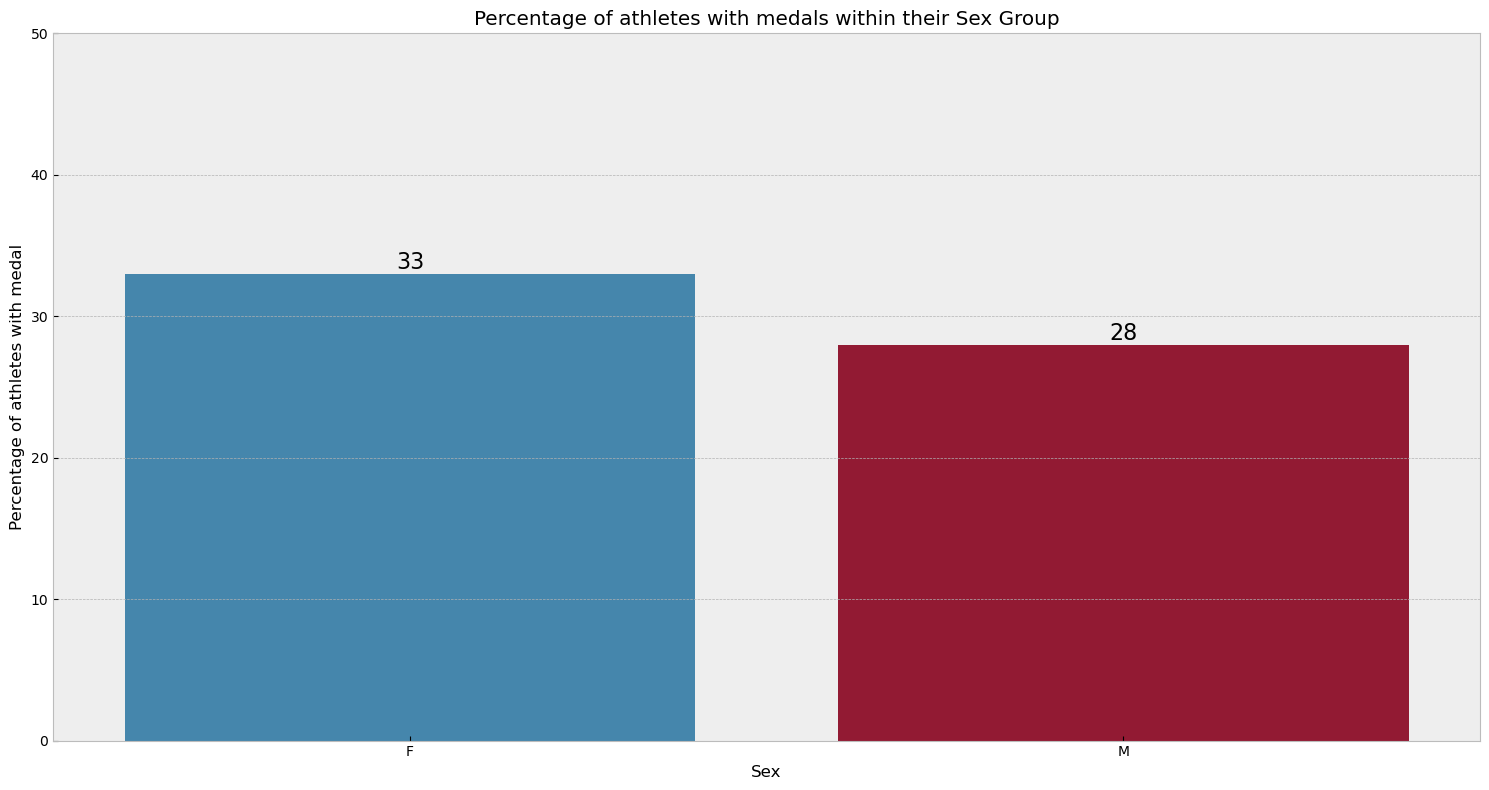

In [102]:

plt.figure(figsize=(15, 8))
ax = sns.barplot(medals_per_athlete2,
                x = 'Sex',
                y = 'Total_medals')
ax.set(ylim = (0, 50))
ax.bar_label(ax.containers[0], size = 16) 
ax.set_ylabel('Percentage of athletes with medal')
ax.set_title('Percentage of athletes with medals within their Sex Group')

plt.tight_layout()
plt.style.use('bmh')
plt.savefig('athlete_with_medals.jpeg')
plt.show()


In [ ]:
## Number of medals by organising country

org = sqldf('''SELECT  Team,
                        COUNT(DISTINCT Name) AS Total_athletes,
                        SUM(CASE WHEN Medal = 'Gold' THEN 1
                                WHEN Medal = 'Silver' THEN 1
                                WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Medals ''')